In [2]:
#구글코랩사용시에만 필요함!!

from google.colab import drive
import os

if os.path.exists('/content/gdrive')==False:
    drive.mount('/content/gdrive')
    print('Google Drive is mounted\n')
else:
    print('Google Drive is already mounted\n')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Google Drive is mounted



In [3]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Add, LeakyReLU, UpSampling2D
from keras.models import Model, load_model
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


Load Dataset

In [4]:
x_train = np.load('/content/gdrive/My Drive/Colab Notebooks/의료/CT_lung_segmention/dataset/x_train.npy')
y_train = np.load('/content/gdrive/My Drive/Colab Notebooks/의료/CT_lung_segmention/dataset/y_train.npy')
x_val = np.load('/content/gdrive/My Drive/Colab Notebooks/의료/CT_lung_segmention/dataset/x_val.npy')
y_val = np.load('/content/gdrive/My Drive/Colab Notebooks/의료/CT_lung_segmention/dataset/y_val.npy')

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(240, 256, 256, 1) (240, 256, 256, 1)
(27, 256, 256, 1) (27, 256, 256, 1)


Build model

In [5]:
inputs = Input(shape=(256, 256, 1))

net = Conv2D(32, kernel_size=3, activation='relu', padding='same')(inputs)
net = MaxPooling2D(pool_size=2, padding='same')(net)

net = Conv2D(64, kernel_size=3, activation='relu', padding='same')(net)
net = MaxPooling2D(pool_size=2, padding='same')(net)

net = Conv2D(128, kernel_size=3, activation='relu', padding='same')(net)
net = MaxPooling2D(pool_size=2, padding='same')(net)

net = Dense(128, activation='relu')(net)

net = UpSampling2D(size=2)(net)
net = Conv2D(128, kernel_size=3, activation='sigmoid', padding='same')(net)

net = UpSampling2D(size=2)(net)
net = Conv2D(64, kernel_size=3, activation='sigmoid', padding='same')(net)

net = UpSampling2D(size=2)(net)
outputs = Conv2D(1, kernel_size=3, activation='sigmoid', padding='same')(net)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', 'mse'])

model.summary()








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       73856     
________________________

Train

In [6]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32, callbacks=[
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, verbose=1, mode='auto', min_lr=1e-05)
])




Train on 240 samples, validate on 27 samples
Epoch 1/100





240/240 [==============================] - 20s 84ms/step - loss: 0.5873 - acc: 0.7306 - mean_squared_error: 0.1896 - val_loss: 0.4972 - val_acc: 0.7674 - val_mean_squared_error: 0.1592
Epoch 2/100
240/240 [==============================] - 2s 9ms/step - loss: 0.4957 - acc: 0.7494 - mean_squared_error: 0.1615 - val_loss: 0.4574 - val_acc: 0.7674 - val_mean_squared_error: 0.1482
Epoch 3/100
240/240 [==============================] - 2s 9ms/step - loss: 0.4554 - acc: 0.7494 - mean_squared_error: 0.1494 - val_loss: 0.4111 - val_acc: 0.7674 - val_mean_squared_error: 0.1338
Epoch 4/100
240/240 [==============================] - 2s 9ms/step - loss: 0.4237 - acc: 0.7480 - mean_squared_error: 0.1401 - val_loss: 0.4107 - val_acc: 0.7552 - val_mean_squared_error: 0.1334
Epoch 5/100
240/240 [==============================] - 2s 9ms/step - loss: 0.4399 - acc: 0.7501 - mean_squared_error: 0.1452 - val_loss: 0.3913 - val_acc: 0.7674 - v

Evaluation

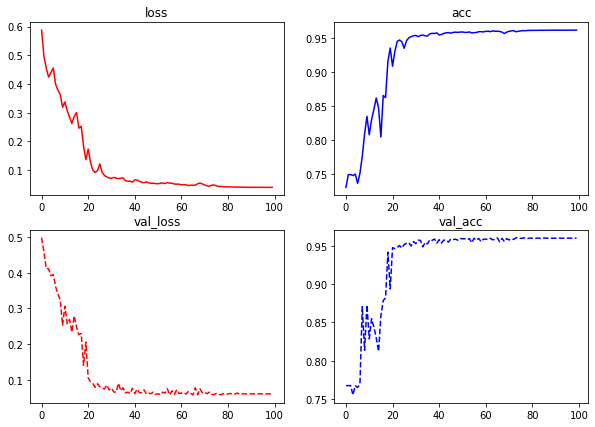

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(10, 7))

ax[0, 0].set_title('loss')
ax[0, 0].plot(history.history['loss'], 'r')
ax[0, 1].set_title('acc')
ax[0, 1].plot(history.history['acc'], 'b')

ax[1, 0].set_title('val_loss')
ax[1, 0].plot(history.history['val_loss'], 'r--')
ax[1, 1].set_title('val_acc')
ax[1, 1].plot(history.history['val_acc'], 'b--')

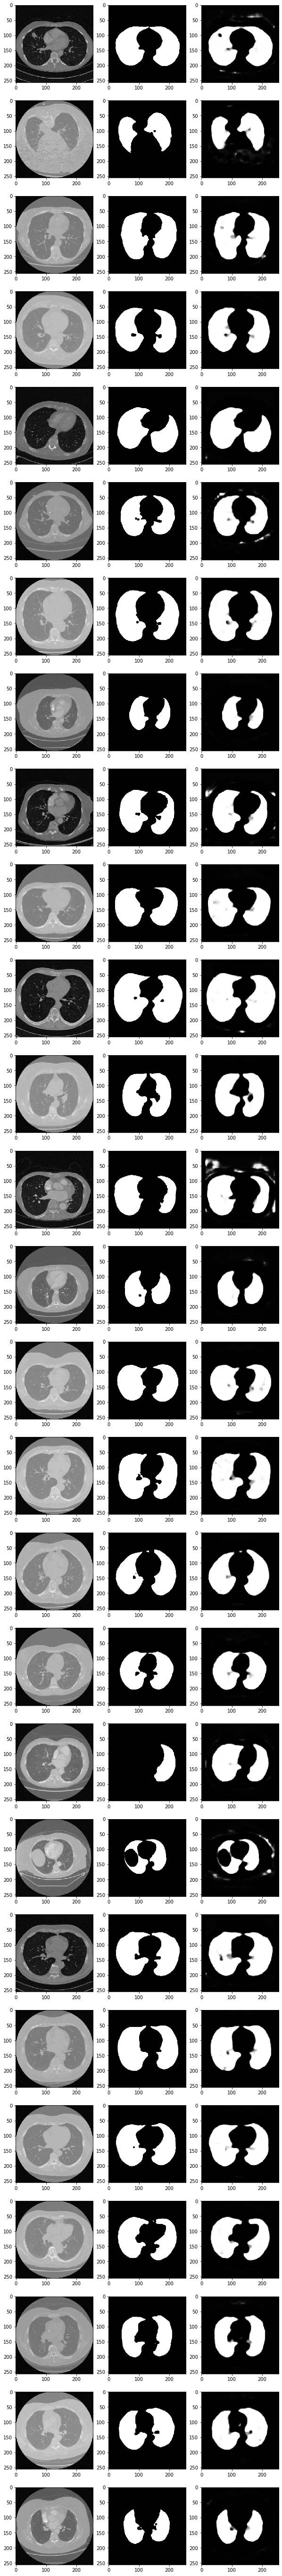

In [8]:
preds = model.predict(x_val)

fig, ax = plt.subplots(len(x_val), 3, figsize=(10, 100))

for i, pred in enumerate(preds):
    ax[i, 0].imshow(x_val[i].squeeze(), cmap='gray')
    ax[i, 1].imshow(y_val[i].squeeze(), cmap='gray')
    ax[i, 2].imshow(pred.squeeze(), cmap='gray')